<a href="https://colab.research.google.com/github/Haarrsshhiitt/datapractice1/blob/master/03_A_Data_Science_campaign_with_pandas_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 3 - A Data Science campaign with pandas and PCA
This unit covers:
* Essential data wrangling with `pandas`;
* Working with different data types;
* Discerning categorical from numerical features;
* Spotting and interpreting the PCA 'variance bug';
* Working with a public data set.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Essential Python tools and concepts – `pandas`

In this practical we will predominantly be working with the `pandas` library. 


In [2]:
import numpy as np
import pandas as pd

### Pandas Series

A Series is a one-dimensional list of values. 

Note the `NaN` value - it means "Not a Number". Originally this represents an undefined numerical, like the result of a division by zero. It is often used to denote missing values. 

In [3]:
values =[1, 3, 5, np.nan, 6, 8,9] # a list of values
pd.Series(values)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
6    9.0
dtype: float64

It can have an index associated with each value. 

In [4]:
s = pd.Series(values, index=['a', 'b', 'c', 'd', 'e', 'f','g'])
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
g    9.0
dtype: float64

####  Task
Add a letter to the index. What happens? How do you need to change the values list to fix the error?

### Pandas Data Frames
A **data frame** is like a two-dimensional series.

In [5]:
df = pd.DataFrame(np.random.randn(6,4)) # note the size: 6 rows, 4 columns
df

,0,1,2,3
0,-3.033650,-1.100600,0.685992,0.056715
1,-1.259765,1.332104,0.730239,1.531268
2,-1.520854,-1.137688,1.824723,-0.260145
3,-1.112888,0.865628,0.001394,-0.124251
4,-0.220394,-1.258585,-1.498666,-0.078848
5,1.015424,-0.771007,-1.523037,0.165005


You can pass it an index during construction:

In [6]:
df = pd.DataFrame(np.random.randn(6,5), 
                  index=["{}".format(i) for i in range(6)]) # note the size: 6 rows, 5 columns
df

,0,1,2,3,4
0,-0.604030,-0.823604,-0.091727,0.263639,-0.538746
1,0.278102,1.397110,-0.995535,-0.091268,0.837164
2,1.345514,0.766482,0.751849,0.580192,0.318306
3,-1.935073,-1.235443,0.412168,-1.113737,0.573505
4,0.108071,-0.789447,-0.870702,0.197473,0.597735
5,1.031286,-0.952951,0.764778,-0.804937,-1.970917


Likewise, you can pass column names:

In [7]:
df = pd.DataFrame(np.random.randn(6,5), 
                  index=["row {}".format(i) for i in range(6)],
                  columns=['col {}'.format(i) for i in range(5)]) 
df

,col 0,col 1,col 2,col 3,col 4
row 0,-0.544346,-0.655796,-0.333497,-0.080432,1.662859
row 1,0.012186,-1.515485,-0.455969,-0.821564,-1.659219
row 2,-1.071020,0.838161,-0.522969,0.250757,1.505118
row 3,-1.410369,1.259734,0.101748,1.107762,0.353569
row 4,0.466055,0.144912,0.788733,-0.603798,2.153972
row 5,0.266253,-0.257114,-0.075231,0.448577,0.708886


You can also construct it from a dictionary:

In [11]:
columns = {'beep': np.random.randn(1000),
           'bop': np.random.randn(1000),
           'bup': np.random.randn(1000),
           'bap': np.random.randn(1000)}
df = pd.DataFrame(columns, index=["xxx{}".format(i) for i in range(1000)])
df

,beep,bop,bup,bap
xxx0,-0.659472,0.805708,-0.947694,-0.281677
xxx1,2.349121,-0.017668,-0.722324,-0.650512
xxx2,-3.064043,0.059973,1.076455,-0.033724
xxx3,-0.092479,-1.137541,0.250296,0.356004
xxx4,-1.200659,-1.238092,1.288591,0.965739
...,...,...,...,...
xxx995,1.489918,0.703959,0.288291,-0.100965
xxx996,-2.526332,-0.808115,-0.493687,-0.458571
xxx997,1.294422,-1.188150,-0.481011,-0.159048
xxx998,1.107394,0.567508,-0.442850,0.804047


### Data frame addressing
We can now address parts of the data by their row and column names. Columns are addressed like this:

In [12]:
df['bop']

xxx0      0.805708
xxx1     -0.017668
xxx2      0.059973
xxx3     -1.137541
xxx4     -1.238092
            ...   
xxx995    0.703959
xxx996   -0.808115
xxx997   -1.188150
xxx998    0.567508
xxx999    0.380816
Name: bop, Length: 1000, dtype: float64

Note that the return value type is a Series, not like a Data Frame! This is because it's one-dimensional.

Extract multiple columns at once by passing a list of column names. Does not need to be unique!

In [13]:
df[['bop', 'bap', 'bap']]

,bop,bap,bap
xxx0,0.805708,-0.281677,-0.281677
xxx1,-0.017668,-0.650512,-0.650512
xxx2,0.059973,-0.033724,-0.033724
xxx3,-1.137541,0.356004,0.356004
xxx4,-1.238092,0.965739,0.965739
...,...,...,...
xxx995,0.703959,-0.100965,-0.100965
xxx996,-0.808115,-0.458571,-0.458571
xxx997,-1.188150,-0.159048,-0.159048
xxx998,0.567508,0.804047,0.804047


Here, the return value is a DataFrame because it's two-dimensional.

Rows use the `.loc` attribute:

In [18]:
df.loc[['xxx0', 'xxx525']]

,beep,bop,bup,bap
xxx0,-0.659472,0.805708,-0.947694,-0.281677
xxx525,-1.428621,-0.571520,1.165310,-0.720305


The `.iloc` attribute will allow you to specify the number of the row, instead of its label:

In [20]:
df.iloc[619]

beep   -0.162797
bop    -0.121574
bup    -0.183528
bap    -0.960676
Name: xxx619, dtype: float64

It can also use numpy-style addressing for the value matrix:

In [24]:
df.iloc[27,:3]

beep    1.734997
bop    -2.409914
bup     0.284874
Name: xxx27, dtype: float64

In [26]:
df.iloc[67:99,0:3]

,beep,bop,bup
xxx67,1.499789,-0.055334,1.024628
xxx68,0.316154,-0.649858,1.321438
xxx69,-0.031167,0.763844,-1.829932
xxx70,2.068295,-0.013831,0.839486
xxx71,-0.116590,1.355488,0.058849
xxx72,-0.296863,-0.280355,0.101813
xxx73,-0.572262,-0.543573,-1.962873
xxx74,-0.474513,-0.863218,0.485211
xxx75,1.264686,-1.346767,1.076786
xxx76,-0.476405,1.001019,-0.367058


### Advanced data frames

Pandas supports all kinds of data types. A data frame can hold all sorts of data types at the same time. This is the principal difference to a `numpy.array`, where all elements need to be of the same data type.

In [36]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(6, index=list(range(8)), dtype='float32'),
                    'D': np.array([9] * 8, dtype='int64'),
                    'E': pd.Categorical(["test", "train", "test1", "train","test", "train1", "test", "train"]),
                    'F': 'ool'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,6.0,9,test,ool
1,1.0,2013-01-02,6.0,9,train,ool
2,1.0,2013-01-02,6.0,9,test1,ool
3,1.0,2013-01-02,6.0,9,train,ool
4,1.0,2013-01-02,6.0,9,test,ool
5,1.0,2013-01-02,6.0,9,train1,ool
6,1.0,2013-01-02,6.0,9,test,ool
7,1.0,2013-01-02,6.0,9,train,ool


The `info()` function gives you an overview of the data types:

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       8 non-null      float64       
 1   B       8 non-null      datetime64[ns]
 2   C       8 non-null      float32       
 3   D       8 non-null      int64         
 4   E       8 non-null      category      
 5   F       8 non-null      object        
dtypes: category(1), datetime64[ns](1), float32(1), float64(1), int64(1), object(1)
memory usage: 564.0+ bytes


This is all the `pandas` you'll need in this practical. Feel free to make yourself familiar with what else `pandas` has to offer. A good starting point is [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) in the official `pandas` documentation.

# Data campaign: Cars 
You now know (almost) all you need to know to start your first data science campaign. We will analyse the "cars" data set. It contains data on historic car models. You will be guided through the first steps, then it's up to you to apply PCA to explore the data. 

Let's load the data from the internet and make a data frame:

In [51]:
# use read_csv to read data from url 
# use set_index to set index 'model" 
# show dataframe.

cars = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
cars = cars.set_index('model')
cars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


### Descriptive statistics


Let's have a quick look at some descriptive statistics.

In [52]:
cars.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [53]:
cars.var()

mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

#### Task
What do you notice about the variance?

There's also a command that gives you a few common statistical descriptors, all in one data frame. Up to you to decide which you like better!

In [54]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [55]:
cars.drop(["vs","am"], axis=1, inplace=True)
cars

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
model,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,4,2


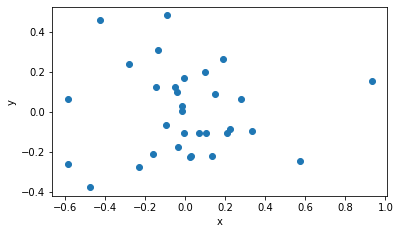

In [56]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(cars)
cars_pca = pca.transform(cars)

ax = plt.gca()
ax.scatter(cars_pca[:,6], cars_pca[:,8])
ax.axis('scaled')
t = ax.set_xlabel('x')
t = ax.set_ylabel('y')

[Text(0, 0, 'PC0'),
 Text(0, 0, 'PC1'),
 Text(0, 0, 'PC2'),
 Text(0, 0, 'PC3'),
 Text(0, 0, 'PC4'),
 Text(0, 0, 'PC5'),
 Text(0, 0, 'PC6'),
 Text(0, 0, 'PC7')]

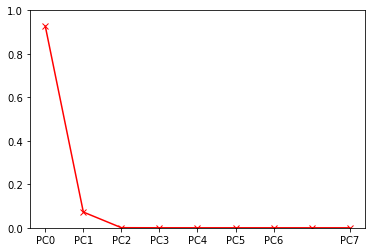

In [77]:
ax = plt.gca()
expl_var = pca.explained_variance_ratio_
ax.plot(expl_var, marker='x',c='red')
ax.set_ylim(0,1.)
ax.set_xticks([0,1,2,3,4,5,6,8])
ax.set_xticklabels(["PC{}".format(i) for i in range(8)])

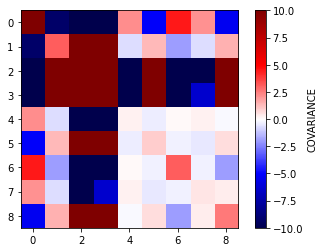

In [70]:
ax = plt.gca()
covmat = pca.get_covariance()
img = ax.imshow(covmat, cmap='seismic', vmin=-10, vmax=10)
plt.colorbar(img, label='COVARIANCE')
# we have observed that feature of 2 is directly corelated with feaature 1. 
# from below graph you can observe feature is 3 also is directly corelated with feaature 1.
# feature 8 is directly corelated with feaature 3 and also same as with feature 3.
# feature 5 is directly corelated with feaature 2& feature 3.

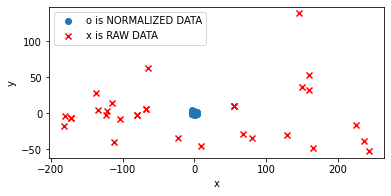

In [119]:
from sklearn import preprocessing as pp
ss = pp.StandardScaler()
ss.fit(cars)
pca_norm = PCA()
pca_norm.fit(ss.transform(cars))
cars_pca_norm = pca_norm.transform(ss.transform(cars))
cars_pca_norm

# plotting scatter plot after Normalise the data to zero mean and unit variance
ax = plt.gca()
ax.scatter(cars_pca_norm[:,0], cars_pca_norm[:,1])
ax.axis('scaled')
t = ax.set_xlabel('x')
t = ax.set_ylabel('y')

ax.scatter(cars_pca[:,0], cars_pca[:,1],marker="x",c="red")# this is before normalization
ax.axis('scaled')
t = ax.set_xlabel('x')
t = ax.set_ylabel('y')

ax.legend(['o is NORMALIZED DATA','x is RAW DATA'])

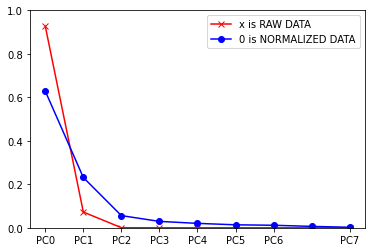

In [124]:
ax = plt.gca()
expl_var = pca.explained_variance_ratio_
ax.plot(expl_var, marker='x',c='red')
ax.set_ylim(0,1.)
ax.set_xticks([0,1,2,3,4,5,6,8])
ax.set_xticklabels(["PC{}".format(i) for i in range(8)])

ax.plot(pca_norm.explained_variance_ratio_,marker='o',c='blue'),
ax.legend(['x is RAW DATA','0 is NORMALIZED DATA'])

# As we can observe PC0,PC1,PC2 has declined.

Text(0.5, 1.0, 'NORMALIZED DATA')

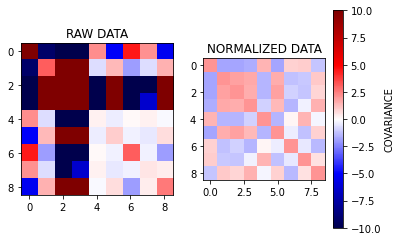

In [154]:

f,(ax1,ax2)=plt.subplots(1,2)
covmat = pca.get_covariance()
img = ax1.imshow(covmat, cmap='seismic', vmin=-10, vmax=10)
plt.colorbar(img, label='COVARIANCE')
ax1.set_title('RAW DATA')

img1 = ax2.imshow(pca_norm.get_covariance(), cmap='seismic', vmin=-5, vmax=5)
ax2.set_title('NORMALIZED DATA')

# we can clearly observe that after normalization, covariance is reduced.

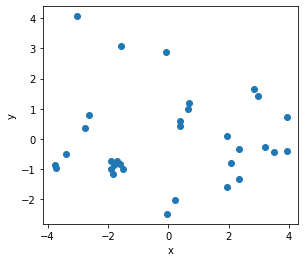

In [155]:
# after normalization 
ax = plt.gca()
ax.scatter(cars_pca_norm[:,0], cars_pca_norm[:,1])
ax.axis('scaled')
t = ax.set_xlabel('x')
t = ax.set_ylabel('y')



In [175]:
cars_pca_norm[:,0:2]

array([[ 0.67485176,  1.19222391],
       [ 0.64739389,  0.99257693],
       [ 2.33653412, -0.33181502],
       [ 0.21874167, -2.00844107],
       [-1.61236724, -0.84198902],
       [-0.05039885, -2.48583323],
       [-2.75782987,  0.36683014],
       [ 2.07640796, -0.81345226],
       [ 2.3317907 , -1.32649137],
       [ 0.38864206,  0.59041962],
       [ 0.37239188,  0.41879267],
       [-1.91482537, -0.7357065 ],
       [-1.69781116, -0.72586714],
       [-1.80535629, -0.85462822],
       [-3.70798697, -0.96325813],
       [-3.76970673, -0.85617849],
       [-3.38527779, -0.48825039],
       [ 3.50760397, -0.43963118],
       [ 3.91645757,  0.71975052],
       [ 3.91656488, -0.39340688],
       [ 1.93421725, -1.59772645],
       [-1.83288975, -1.15224322],
       [-1.48827419, -0.99340808],
       [-2.64298174,  0.77719959],
       [-1.90423467, -0.99482361],
       [ 3.19868255, -0.2593413 ],
       [ 2.82386873,  1.66353594],
       [ 2.9555005 ,  1.41857796],
       [-1.57289857,

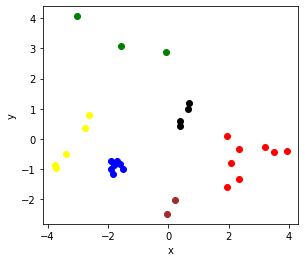

In [217]:
from sklearn.cluster import KMeans 
import numpy as np
data=np.array(cars_pca_norm[:,0:2])
kk=KMeans(n_clusters=7).fit(data)
kk1=kk.predict(cars_pca_norm[:,0:2])
kk1
data[kk1==1]


import matplotlib.pyplot as plt
ax = plt.gca()
ax.scatter(data[kk1==1][:,0],data[kk1==1][:,1],c="red")
ax.scatter(data[kk1==0][:,0],data[kk1==0][:,1],c="blue")
ax.scatter(data[kk1==2][:,0],data[kk1==2][:,1],c="green")
ax.scatter(data[kk1==3][:,0],data[kk1==3][:,1],c="yellow")
ax.scatter(data[kk1==4][:,0],data[kk1==4][:,1],c="brown")
ax.scatter(data[kk1==5][:,0],data[kk1==5][:,1],c="black")
ax.axis('scaled')
t = ax.set_xlabel('x')
t = ax.set_ylabel('y')


In [218]:
cars[kk1==0]
# the common features in data set after clustering.

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
model,,,,,,,,,
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,3,2
Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,3,3
Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,3,3
Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,3,3
Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,3,2
AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,3,2
Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,3,2


## Numerical vs. categorical features
**Numerical features** express a quantitative relationship between an instance and a feature. For example, 'height' is a numerical feature of a human. 

**Categorical features** express whether an instance belongs in a certain category. 'Male', 'female' are two categories that apply to humans (alongside others).

Most interesting data sets contain numerical **and** categorical features.

For PCA, only numerical features are useful (most of the time). 

These are the features of the cars dataset:
* mpg: Miles per (US) gallon
* cyl: Number of cylinders
* disp: Displacement (cubic inches)
* hp: Gross horsepower
* drat: Rear axle ratio
* wt: Weight (1000 lbs)
* qsec: 1/4 mile time
* vs: V-engine (0) or straight engine (1)
* am: Transmission (0 = automatic, 1 = manual)
* gear: Number of forward gears
* carb: Number of carburators


### **Task: remove categorical features** 
1. Decide which features are categorical, which are numerical. Search the internet if you don't know what a certain feature means.  
2. Delete categorical features from the data frame. Use the `.drop()` function. Documentation is available [online](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) or with the built-in documentation accessed by typing `pd.DataFrame.drop?` in a cell and executing it. 

### Task: Analyse the cleaned data set using PCA

1. Do a pca on the raw data.
2. Produce a scatter plot of the PCA'd data.
2. Produce a scree plot and analyse how much variance is captured in the first 2 components.
3. Plot the covariance matrix of the dataset. What stands out? 
3. Look at the components of the dataset. Which features are highly represented in the first two components?

### Task: Normalise and observe the effect (the *variance bug*)
1. Normalise the data to zero mean and unit variance and repeat the steps above. 
5. How does the scatter plot of the first two PCs compare to the PCA on the raw data before normalisation? 
6. What's the difference in the scree plot?
7. How is the covariance matrix different?
7. How do components differ? 
8. *(Advanced)* Spot a cluster in the plotted data, find the corresponding data points, figure out what they have in common.



# Coronavirus epidemic dynamics

Here's a task for advanced students. As you all are aware, last spring we saw the outbreak of Covid-19, aka coronavirus. Here, we're going to analyse a dataset from the beginning of the outbreak, when it was just about to spread around the world. 

### Task: Explore data on kaggle.com
1. Go to the website on the kaggle site: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset 
2. Inspect the data on the website and the various ways the site lets you explore it. Registration on the website is not necessary.



## Working with the Coronavirus outbreak data
1. The coronavirus dataset is provided on canvas. Download and save it in the same folder as this notebook.
2. Unzip the data.
3. Verify that the folder in which this notebook resides should now contain a sub-folder named `novel-corona-virus-2019-dataset`

First we load the main dataset into a DataFrame:

In [293]:
df = pd.read_csv('/content/2019_nCoV_data.csv')
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1714,1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0
1715,1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0
1716,1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0
1717,1718,02/17/2020 22:00:00,"Seattle, WA",US,2020-02-09T07:03:04,1.0,0.0,1.0


If this fails then please check again whether the dataset folder is unzipped and resides in the same folder as this notebook. Check that the filename in the command matches the filename of the data set on disk.

The `Sno` column contains the serial number and is identical with the aut-generated index column. let's set the Index to track the `Sno` column:

In [294]:
df = df.set_index('Sno')
df 

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
Sno,,,,,,,
1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0
1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0
1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0


In [ ]:
# Numeric: confirmed, deaths, recovered
# continuous: date, last update
# categorical: province state/country

Let's explore the data types.

### Task: 
Which features are numeric? Which are continuous? Which are categorical?

## Initial exploration
Let's plot the number of number of confirmed cases for the whole data set.

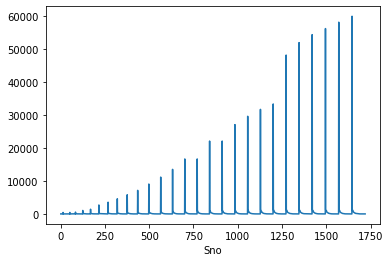

In [295]:
df['Confirmed'].plot()

### Task

Is this the plot you expected? Why not? 

Solution: The above command naively plots the whole column, but ignores the structure of the data set, where each line applies to a different province/state, or even country.

We need to filter by country! Let's look only at the Hubei province, the root of the outbreak:

In [296]:
df.loc[df['Province/State'] == 'Hubei']

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
Sno,,,,,,,
14,01/22/2020 12:00:00,Hubei,China,01/22/2020 12:00:00,444.0,0.0,0.0
52,01/23/2020 12:00:00,Hubei,Mainland China,01/23/2020 12:00:00,444.0,17.0,28.0
84,01/24/2020 12:00:00,Hubei,Mainland China,01/24/2020 12:00:00,549.0,24.0,31.0
125,01/25/2020 22:00:00,Hubei,Mainland China,01/25/2020 22:00:00,1052.0,52.0,42.0
169,01/26/2020 23:00:00,Hubei,Mainland China,01/26/2020 23:00:00,1423.0,76.0,44.0
216,01/27/2020 20:30:00,Hubei,Mainland China,01/27/2020 20:30:00,2714.0,100.0,47.0
268,01/28/2020 23:00:00,Hubei,Mainland China,01/28/2020 23:00:00,3554.0,125.0,80.0
320,01/29/2020 21:00:00,Hubei,Mainland China,01/29/2020 21:00:00,4586.0,162.0,90.0
376,01/30/2020 21:30:00,Hubei,Mainland China,01/30/2020 21:30:00,5806.0,204.0,116.0


That looks better! Let's plot those values:

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
Sno,,,,,,,
1,2020-01-22 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
2,2020-01-22 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
3,2020-01-22 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
4,2020-01-22 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
5,2020-01-22 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1715,2020-02-17 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0
1716,2020-02-17 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0
1717,2020-02-17 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0


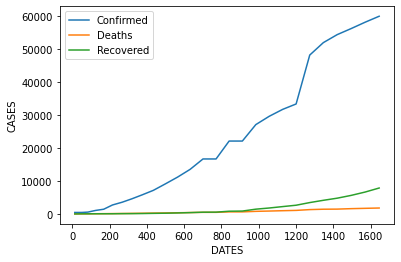

In [297]:
ax=df.loc[df['Province/State'] == 'Hubei'].plot()
ax.set_xlabel('DATES')
ax.set_ylabel('CASES')
array=[]
from datetime import datetime
for i in ["Date"]:
 array.append(datetime.strptime(i,'%m/%d/%Y %H:%M:%S'))
df['Date']=array
df

Text(0, 0.5, 'TOTAL CASES')

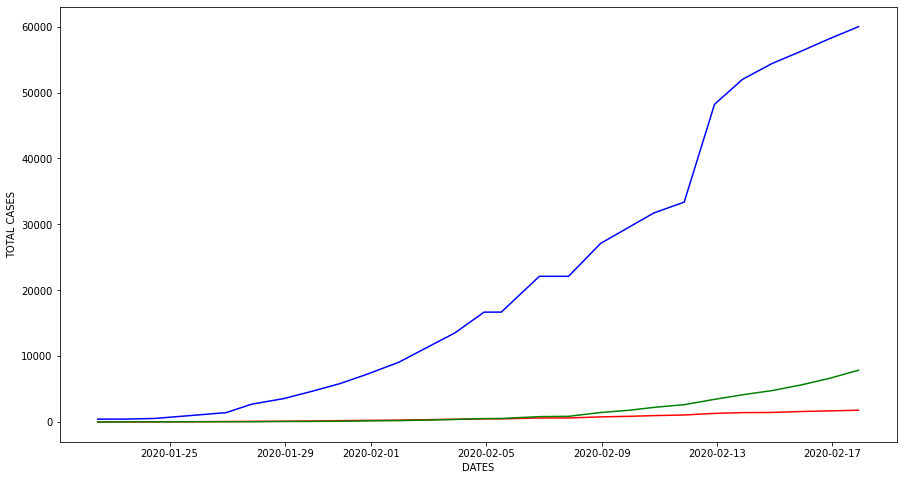

In [328]:

df1=df.loc[df['Province/State'] == 'Hubei']
import matplotlib.pyplot as plt
ax=plt.gca()
ax.figure.set_size_inches(15,8.0)
ax.plot(df1['Date'],df1['Confirmed'],c='blue')
ax.plot(df1['Date'],df1['Deaths'],c='red')
ax.plot(df1['Date'],df1['Recovered'],c='green')
ax.set_xlabel('DATES')
ax.set_ylabel('TOTAL CASES')
# ax.legend(["No. of cases])
# ax.legend(['x is RAW DATA','0 is NORMALIZED DATA'])

Note how the `.plot()` function of the `DataFrame` object already gives us a plot of all numerical features, complete with a legend!

The plot is still lackiong though; It needs for example:
* Dates on the x-axis
* proper labels on the y-axis

### Task (advanced)
* Read the documentation of the `DataFrame.plot` command to learn how to make it plot the date on the x-axis.
* use the `ax = gca()` method the get an axis object, and call the `set_ylabel()` method to set an appropriate y-label.

### Task (advanced)
* Plot the data for all of China.
* Aggregate the data for the rest of the world and plot it.

Text(0, 0.5, 'TOTAL CASES')

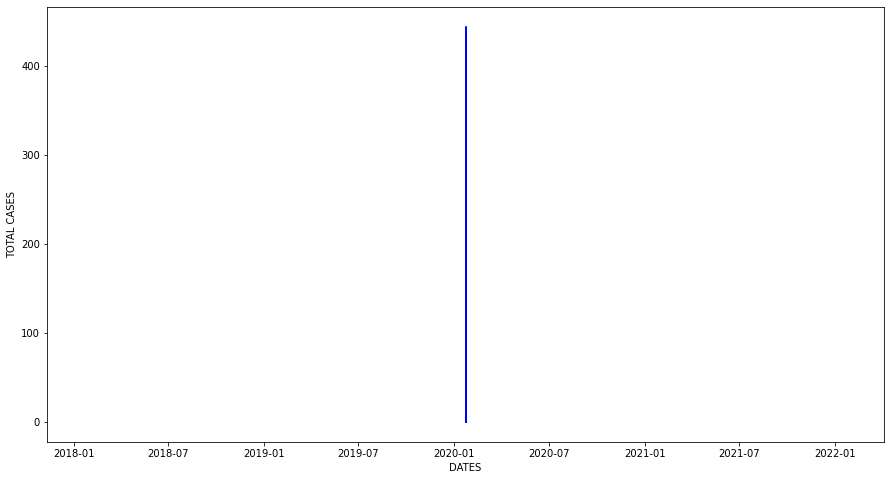

In [336]:
df2=df.loc[df['Country'] == 'China']

import matplotlib.pyplot as plt
ax=plt.gca()
ax.figure.set_size_inches(15,8)
ax.plot(df2['Date'],df2['Confirmed'],c='blue')
ax.plot(df2['Date'],df2['Deaths'],c='red')
ax.plot(df2['Date'],df2['Recovered'],c='green')
ax.set_xlabel('DATES')
ax.set_ylabel('TOTAL CASES')


Text(0, 0.5, 'TOTAL CASES')

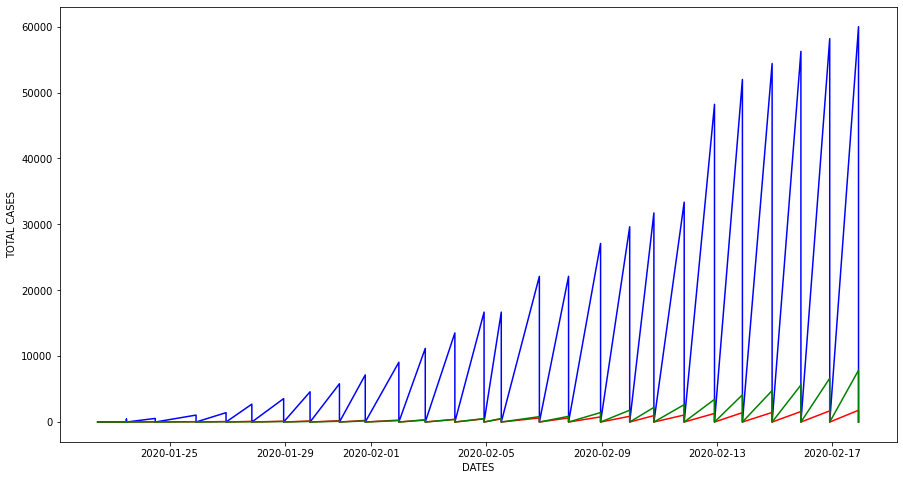

In [341]:
df3=df.loc[df['Country'] != 'China']

import matplotlib.pyplot as plt
ax=plt.gca()
ax.figure.set_size_inches(15,8)
ax.plot(df3['Date'],df3['Confirmed'],c='blue')
ax.plot(df3['Date'],df3['Deaths'],c='red')
ax.plot(df3['Date'],df3['Recovered'],c='green')
ax.set_xlabel('DATES')
ax.set_ylabel('TOTAL CASES')

## That's it for today!
We have covered have learnt:
* Essential `pandas`; how to create, address and modify `pandas` `DataFrame`s.
* How to perform a data science campaign using PCA.
* Initial loading and ploting of time-series data.

Next week we'll continue our analysis of the coronavirus data, with a special focus on visualisation.